### Predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost.

* Data Set Information:
    
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

* Attribute Information:
Listing of attributes: >50K, <=50K.

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school,Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married,Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial,Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico,Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### Import The Libraries

In [1]:
import numpy as np
import pandas as pd

In [110]:
## Read The Dataset
cols=['age','workclass', 'fnlwgt', 'education','education-num','marital-status','occupation','relationship','race',
      'sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
data = pd.read_csv('adult.data',names = cols)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
## Find if dataset is balanced
data.salary.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [36]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [62]:
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_df['age'].describe())

Race:  Amer-Indian-Eskimo, sex:  Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race:  Amer-Indian-Eskimo, sex:  Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race:  Asian-Pac-Islander, sex:  Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race:  Asian-Pac-Islander, sex:  Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race:  Black, sex:  Female
count    1555.000000
mean       37.854019
std        12.637197
min       

In [7]:
import seaborn as sns

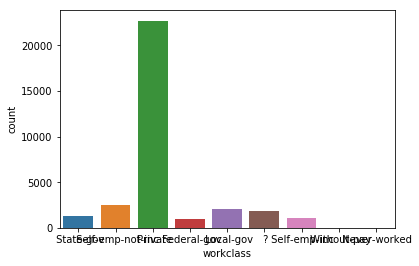

In [8]:
sns.countplot(adult['workclass'])

In [111]:
df_wc = pd.get_dummies(data = adult['workclass'],prefix='wc',drop_first=True)
df_wc.head(2)

,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0


In [112]:
df_ed = pd.get_dummies(data = adult['education'],prefix='ed',drop_first=True)
df_ed.head(2)

,ed_ 11th,ed_ 12th,ed_ 1st-4th,ed_ 5th-6th,ed_ 7th-8th,ed_ 9th,ed_ Assoc-acdm,ed_ Assoc-voc,ed_ Bachelors,ed_ Doctorate,ed_ HS-grad,ed_ Masters,ed_ Preschool,ed_ Prof-school,ed_ Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [113]:
df_ms = pd.get_dummies(data = adult['marital-status'],prefix='ms',drop_first=True)
df_ms.head(2)

,ms_ Married-AF-spouse,ms_ Married-civ-spouse,ms_ Married-spouse-absent,ms_ Never-married,ms_ Separated,ms_ Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0


In [114]:
adult.occupation.value_counts()
df_occu = pd.get_dummies(data = adult['occupation'],prefix='occu',drop_first=True)
df_occu.head(2)

,occu_ Adm-clerical,occu_ Armed-Forces,occu_ Craft-repair,occu_ Exec-managerial,occu_ Farming-fishing,occu_ Handlers-cleaners,occu_ Machine-op-inspct,occu_ Other-service,occu_ Priv-house-serv,occu_ Prof-specialty,occu_ Protective-serv,occu_ Sales,occu_ Tech-support,occu_ Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [115]:
df_rel = pd.get_dummies(data = adult['relationship'],prefix='rel',drop_first=True)
df_rel.head(2)

,rel_ Not-in-family,rel_ Other-relative,rel_ Own-child,rel_ Unmarried,rel_ Wife
0,1,0,0,0,0
1,0,0,0,0,0


In [116]:
df_race = pd.get_dummies(data = adult['race'],prefix='race',drop_first=True)
df_race.head(2)

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,1
1,0,0,0,1


In [117]:
df_sex = pd.get_dummies(data = adult['sex'],prefix='sex',drop_first=True)
df_sex.head(2)

,sex_ Male
0,1
1,1


In [118]:
df_country = pd.get_dummies(data = adult['native-country'],prefix='native-country',drop_first=True)
df_country.head(2)

,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [119]:
data['salary'] = data['salary'].str.strip()
data['salary'] = np.where(data['salary']=='<=50K',0,1)

In [120]:
y=data['salary']

In [121]:
data.drop(['salary'],axis=1, inplace=True)

In [122]:
data.drop(['workclass','education','marital-status','occupation','race','sex','native-country'],axis=1, inplace=True)

In [123]:
data.head(2)

,age,fnlwgt,education-num,relationship,capital-gain,capital-loss,hours-per-week
0,39,77516,13,Not-in-family,2174,0,40
1,50,83311,13,Husband,0,0,13


In [124]:
df = pd.concat([data,df_wc,df_ed,df_ms,df_occu,df_rel,df_race,df_sex,df_country],axis=1)

In [125]:
df.head(2)

,age,fnlwgt,education-num,relationship,capital-gain,capital-loss,hours-per-week,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,Not-in-family,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,Husband,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [137]:
X=df.drop('relationship',axis=1)

In [138]:
X.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'wc_ Federal-gov', 'wc_ Local-gov',
       'wc_ Never-worked', 'wc_ Private', 'wc_ Self-emp-inc',
       'wc_ Self-emp-not-inc', 'wc_ State-gov', 'wc_ Without-pay', 'ed_ 11th',
       'ed_ 12th', 'ed_ 1st-4th', 'ed_ 5th-6th', 'ed_ 7th-8th', 'ed_ 9th',
       'ed_ Assoc-acdm', 'ed_ Assoc-voc', 'ed_ Bachelors', 'ed_ Doctorate',
       'ed_ HS-grad', 'ed_ Masters', 'ed_ Preschool', 'ed_ Prof-school',
       'ed_ Some-college', 'ms_ Married-AF-spouse', 'ms_ Married-civ-spouse',
       'ms_ Married-spouse-absent', 'ms_ Never-married', 'ms_ Separated',
       'ms_ Widowed', 'occu_ Adm-clerical', 'occu_ Armed-Forces',
       'occu_ Craft-repair', 'occu_ Exec-managerial', 'occu_ Farming-fishing',
       'occu_ Handlers-cleaners', 'occu_ Machine-op-inspct',
       'occu_ Other-service', 'occu_ Priv-house-serv', 'occu_ Prof-specialty',
       'occu_ Protective-serv', 'occu_ Sales', 'occu_ Tech-suppo

### Apply Model

In [139]:
import xgboost

In [140]:
from sklearn.model_selection import cross_val_score
reg = xgboost.XGBClassifier()
score = cross_val_score(reg,X,y,cv=20)
score.mean()

0.8639478629810121

In [141]:
print('The average score of XGBoost model for adult data set is: ',score.mean())

The average score of XGBoost model for adult data set is:  0.8639478629810121
